   Name  Quantity  Amount
0   AAA         9      90
1   BBB        10     100
2   CCC        11     110
3   DDD        12     120
4   EEE        13     130
5   FFF        20     200
6   GGG        21     210
7   HHH        22     220
8   III        23     230
9   JJJ        80     800
10  KKK        60     600
11  LLL        30     300
12  MMM        31     310
13  NNN        32     320
14  OOO        33     330
15  PPP        34     340
16  QQQ        44     440
17  RRR        45     450
18  SSS        46     460
19  TTT        47     470


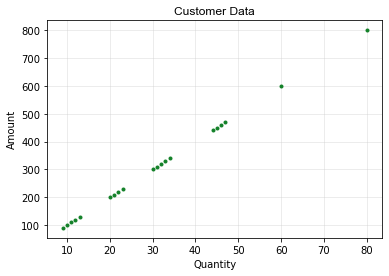

DBSCAN(eps=1)
Counter({0: 18, -1: 2})
   Name  Quantity  Amount
9   JJJ        80     800
10  KKK        60     600
Numberof clusters = 1


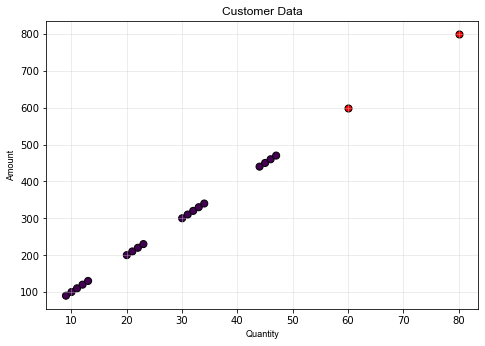

In [2]:
#DBSCAN (Density-based spatial clustering of applications with noise)
#https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/  
#https://www.youtube.com/watch?v=eq1zKgCFwkk

import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14,6
%matplotlib inline

data = [['AAA',9,90],['BBB',10,100],['CCC',11,110],['DDD',12,120],['EEE',13,130],['FFF',20,200], ['GGG',21,210],['HHH',22,220],['III',23,230],['JJJ',80,800],['KKK',60,600],['LLL',30,300],['MMM',31,310],['NNN',32,320],['OOO',33,330],['PPP',34,340], ['QQQ',44,440],['RRR',45,450],['SSS',46,460],['TTT',47,470]]
df = pd.DataFrame(data,columns=['Name','Quantity','Amount'])
print(df)

_=plt.plot(df['Quantity'], df['Amount'], marker='.', linewidth=0, color='#128128')
_=plt.grid(which='major',color='#cccccc', alpha=0.45)
_=plt.title('Customer Data', family='Arial', fontsize=12)
_=plt.xlabel('Quantity')
_=plt.ylabel('Amount')
_=plt.show()

dbscan_data = df[['Quantity','Amount']]
dbscan_data = dbscan_data.values.astype('int64', copy=False)

dbscan_data_scaler = StandardScaler().fit(dbscan_data)
dbscan_data = dbscan_data_scaler.transform(dbscan_data)

model = DBSCAN(eps=1, min_samples=5, metric='euclidean').fit(dbscan_data)
print(model)
outlier_df = df[model.labels_==-1]
cluster_df = df[model.labels_!=-1]

colors = model.labels_
colors_clusters = colors[colors!=-1]
colors_outlier = 'red'

clusters = Counter(model.labels_)
print(clusters)
print(df[model.labels_==-1].head())
print('Numberof clusters = {}'.format(len(clusters)-1))

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])
ax.scatter(cluster_df['Quantity'], cluster_df['Amount'], c=colors_clusters, edgecolors='black', s=50)
ax.scatter(outlier_df['Quantity'], outlier_df['Amount'], c=colors_outlier, edgecolors='black', s=50)
ax.set_xlabel('Quantity', family='Arial', fontsize=9)
ax.set_ylabel('Amount', family='Arial', fontsize=9)
plt.title('Customer Data', family='Arial', fontsize=12)
plt.grid(which='major',color='#cccccc', alpha=0.45)
plt.show()